# Intrinsic Carrier Concentration with Temperature-Dependent Bandgap

This notebook calculates and plots the intrinsic carrier concentration $n_i$ for key semiconductors (**Ge, Si, GaAs**) as a function of temperature using the following model:

$$
n_i = \sqrt{N_c N_v} \cdot \exp\left(-\frac{E_g(T)}{2kT}\right)
$$

with temperature-dependent effective density of states:

$$
N_c(T) = N_{c,300K} \cdot \left(\frac{T}{300}\right)^{3/2}, \quad
N_v(T) = N_{v,300K} \cdot \left(\frac{T}{300}\right)^{3/2}
$$

Temperature-dependent bandgap:

- For Silicon (Si):

$$
E_g(T) = 1.17 - \frac{4.73 \times 10^{-4} \cdot T^2}{T + 636}
$$

- For Germanium (Ge):

$$
E_g(T) = 0.7437 - \frac{4.774 \times 10^{-4} \cdot T^2}{T + 235}
$$

- For Gallium Arsenide (GaAs):

$$
E_g(T) = 1.519 - \frac{5.41 \times 10^{-4} \cdot T^2}{T + 204}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

kT_300K = 0.0259  # eV at 300K
T_range = np.linspace(250, 600, 300)
T_ref = 300
T_ref_inv = 1000 / T_ref

def Eg_Si(T): return 1.17 - (4.73e-4 * T**2) / (T + 636)
def Eg_Ge(T): return 0.7437 - (4.774e-4 * T**2) / (T + 235)
def Eg_GaAs(T): return 1.519 - (5.41e-4 * T**2) / (T + 204)

materials = {
    "Ge": {"Nc_300K": 1.04e19, "Nv_300K": 6.0e18, "Eg_func": Eg_Ge, "color": "blue"},
    "Si": {"Nc_300K": 2.8e19, "Nv_300K": 1.04e19, "Eg_func": Eg_Si, "color": "green"},
    "GaAs": {"Nc_300K": 4.7e17, "Nv_300K": 7.0e18, "Eg_func": Eg_GaAs, "color": "red"}
}

def intrinsic_carrier_concentration(T, Nc_300K, Nv_300K, Eg_T, kT_300K):
    Nc_T = Nc_300K * (T / 300)**1.5
    Nv_T = Nv_300K * (T / 300)**1.5
    kT = kT_300K * (T / 300)
    return np.sqrt(Nc_T * Nv_T) * np.exp(-Eg_T / (2 * kT))


In [2]:
ni_values = {}
for mat, props in materials.items():
    Eg_T = props["Eg_func"](T_range)
    ni_values[mat] = [intrinsic_carrier_concentration(T, props["Nc_300K"], props["Nv_300K"], Eg, kT_300K)
                      for T, Eg in zip(T_range, Eg_T)]


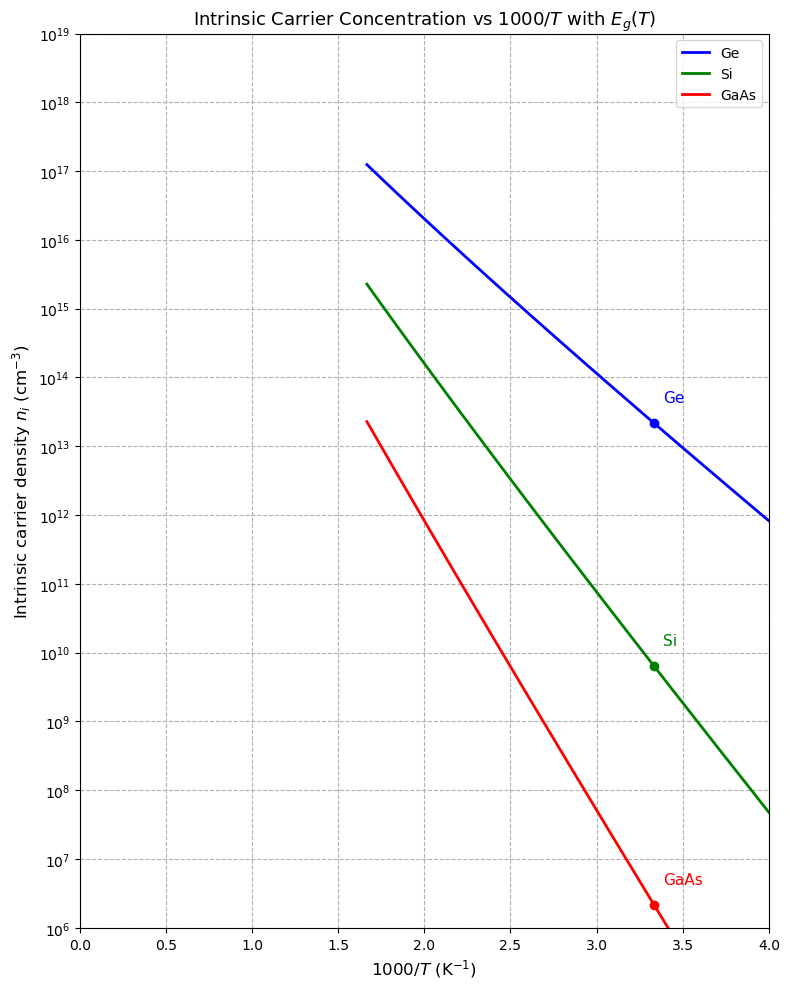

In [5]:
plt.figure(figsize=(8, 10))

for mat, props in materials.items():
    plt.semilogy(1000 / T_range, ni_values[mat], label=mat, color=props["color"], linewidth=2)

    # Reference point at 300K
    Eg_300K = props["Eg_func"](T_ref)
    ni_ref = intrinsic_carrier_concentration(T_ref, props["Nc_300K"], props["Nv_300K"], Eg_300K, kT_300K)
    plt.semilogy(T_ref_inv, ni_ref, 'o', color=props["color"])
    plt.text(T_ref_inv + 0.05, ni_ref * 2, mat, color=props["color"], fontsize=11)

plt.xlabel(r"$1000/T$ (K$^{-1}$)", fontsize=12)
plt.ylabel(r"Intrinsic carrier density $n_i$ (cm$^{-3}$)", fontsize=12)
plt.title("Intrinsic Carrier Concentration vs $1000/T$ with $E_g(T)$", fontsize=13)
plt.grid(True, which='both', ls='--')
plt.xlim(0, 4)
plt.ylim(1e6, 1e19)
plt.xticks(np.arange(0, 4.5, 0.5))
plt.yticks([1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16, 1e17, 1e18, 1e19])
plt.tight_layout()
plt.legend()
plt.show()


In [13]:
# Reconstruct materials_3 dictionary with temperature-dependent bandgap functions
materials_3 = {
    "Ge": {"Nc_300K": 1.04e19, "Nv_300K": 6.0e18, "Eg_func": Eg_Ge, "color": "blue"},
    "Si": {"Nc_300K": 2.8e19, "Nv_300K": 1.04e19, "Eg_func": Eg_Si, "color": "green"},
    "GaAs": {"Nc_300K": 4.7e17, "Nv_300K": 7.0e18, "Eg_func": Eg_GaAs, "color": "red"}
}

# Query intrinsic carrier concentration at any desired temperature
T_query = 500  # Modify this value as needed
ni_queried = {}

for mat, props in materials_3.items():
    Eg_T = props["Eg_func"](T_query)
    ni_val = intrinsic_carrier_concentration(T_query, props["Nc_300K"], props["Nv_300K"], Eg_T, kT_300K)
    ni_queried[mat] = ni_val
    print(f"{mat}: n_i @ {T_query}K = {ni_val:.2e} cm^-3")

Ge: n_i @ 500K = 2.02e+16 cm^-3
Si: n_i @ 500K = 1.60e+14 cm^-3
GaAs: n_i @ 500K = 8.25e+11 cm^-3
